In [1]:
import networkx
import math
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('seaborn-darkgrid')

In [2]:
G_temp = networkx.MultiDiGraph()
def N_k_values(G_temp):
    list_edges_temp = G_temp.edges()
    list_nodes_temp = G_temp.nodes()
    dict_node_degree = {}
    for a in list_nodes_temp:
        dict_node_degree[a] = 0
    for x in list_edges_temp:
        s = x[0]
        dict_node_degree[s] += 1
    list_all_degress = []
    for ky in dict_node_degree:
        list_all_degress.append(dict_node_degree[ky])
    dict_nk_val = Counter(list_all_degress)
    return dict_nk_val

In [3]:
def plot_graph(n_k_val, cnt_node):
    x_cord = []
    y_cord = []
    for a in n_k_val:
        if a == 0:
            x_cord.append(a)
        else:
            x_cord.append(math.log10(a))
        
        prob = n_k_val[a] / cnt_node
        y_cord.append(math.log10(prob))
        
    return x_cord, y_cord

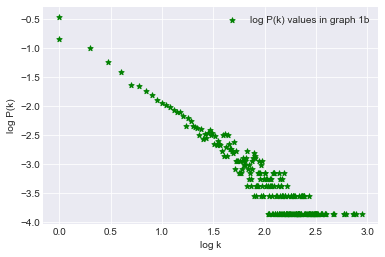

In [4]:
Graph_1b = networkx.MultiDiGraph()

directory = r'D:\M.TECH SEM 2\MLN\Assignments\A1\mln_a1\mln_a1\wiki-Vote.txt'
fp = open(directory, "r")
text = fp.read()
fp.close()
list_lines = text.split("\n")
len_list_lines = len(list_lines)
list_data = list_lines[4: len_list_lines]
list_all_edges = []

for x in list_data:
    a = x.split("\t")
    s = a[0]
    d = a[1]
    pair = (s,d)
    list_all_edges.append(pair)

Graph_1b.add_edges_from(list_all_edges)
list_Graph_1b_edges = Graph_1b.edges()

dict_grp_1b_nk = N_k_values(Graph_1b)

N_1b = len(Graph_1b.nodes())
x_cor, y_cor = plot_graph(dict_grp_1b_nk, N_1b)

plt.scatter(x_cor, y_cor, label= "log P(k) values in graph 1b", color= "green",  marker= "*", s=30) 

plt.xlabel('log k')
plt.ylabel('log P(k)')
plt.legend() 
plt.show()

In [5]:
#Finding the values of x mean and y mean
mean_x = 0
mean_y = 0
ss_xy, ss_xx = 0, 0
for i in range(len(x_cor)):
    mean_x += x_cor[i]
    mean_y += y_cor[i]
    ss_xy = ss_xy + (y_cor[i] * x_cor[i])
    ss_xx = ss_xx + (x_cor[i] * x_cor[i])

mean_x = mean_x / len(x_cor)
mean_y = mean_y / len(y_cor)

ss_xy = ss_xy - (len(x_cor) * mean_x * mean_y)
ss_xx = ss_xx - (len(x_cor) * mean_x * mean_x)

slope = ss_xy / ss_xx
constant_val = mean_y - (slope * mean_x)
print(f"Slope value is = {slope}")
print(f"Constant value is = {constant_val}")

Slope value is = -1.276459964725764
Constant value is = -0.7294390403632245


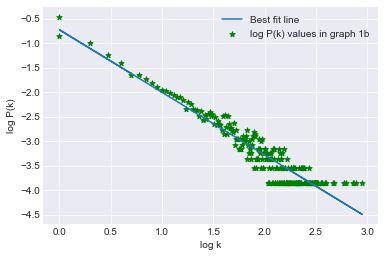

In [6]:
y_cor_pred = []
for i in range(len(x_cor)):
    y_pred = (slope * x_cor[i]) + constant_val
    y_cor_pred.append(y_pred)

plt.scatter(x_cor, y_cor, label= "log P(k) values in graph 1b", color= "green",  marker= "*", s=30) 
plt.plot(x_cor, y_cor_pred, label = "Best fit line")

plt.xlabel('log k')
plt.ylabel('log P(k)')
plt.legend() 
plt.show()